#  4 Basic Visualizations
First, you will create some basic visualizations of the MovieLens dataset described above. Using a method
(e.g. histograms) of your choice, visualize the following:
1. All ratings in the MovieLens Dataset.
2. All ratings of the ten most popular movies (movies which have received the most ratings).
3. All ratings of the ten best movies (movies with the highest average ratings).
4. All ratings of movies from three genres of your choice (create three separate visualizations).


The Python packages Matplotlib and Seaborn are good choices for these visualizations, but there are also
many other good visualization packages.

## Report Deliverable
Your report should contain a section dedicated to basic visualizations. What, in general, did you observe?
Did the results match what you would expect to see? How do the ratings from the most popular movies
compare to the ratings of the best movies? How do the ratings of the three genres you chose compare to
one another?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

sns.set()
ratings = pd.read_table('data/data.txt', header = None, names = ['user', 'movie', 'rating'])


## All ratings from MovieLens

Text(0.5,1,'All ratings from movielens')

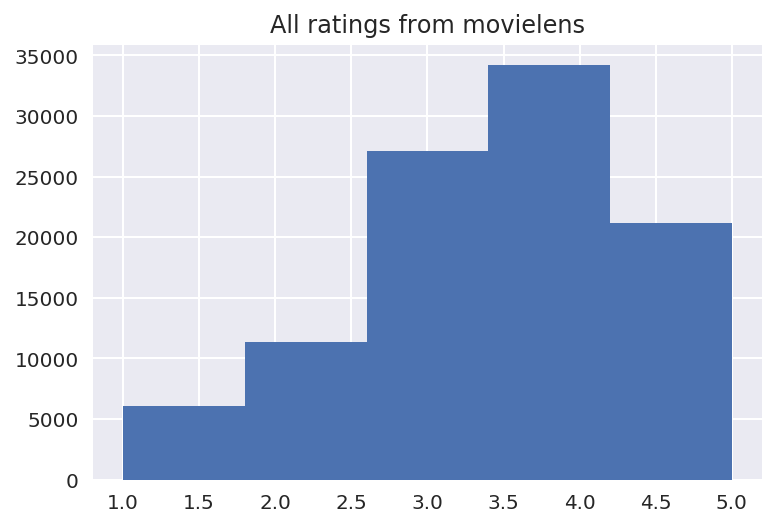

In [2]:
ratings.hist('rating', bins = 5)
plt.title('All ratings from movielens')


## Computing average ratings of all movies

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e45836a0>]],
      dtype=object)

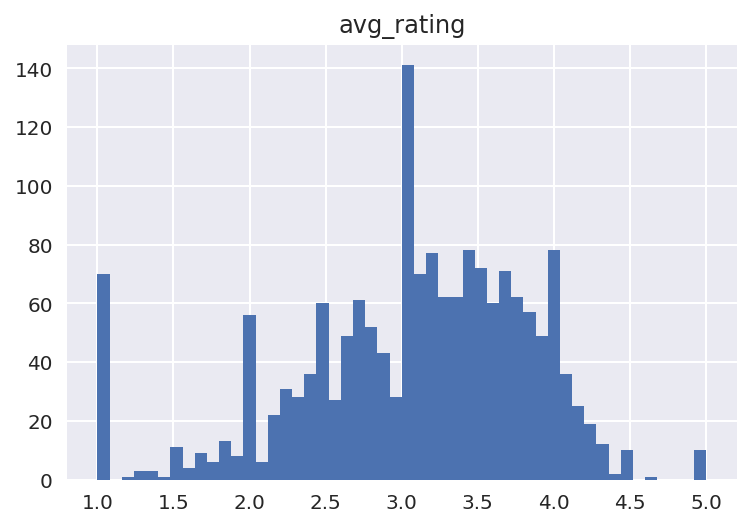

In [3]:
avg_ratings = pd.DataFrame(columns =['movie','avg_rating'])

for movie in range(1,1683):
    avg_ratings = avg_ratings.append({'movie':movie, 'avg_rating':ratings.loc[ratings['movie'] == movie].mean()['rating']},ignore_index=True)

#avg_ratings.head()
avg_ratings.hist('avg_rating', bins = 50)

## Comparing the top 10 best rated movies

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


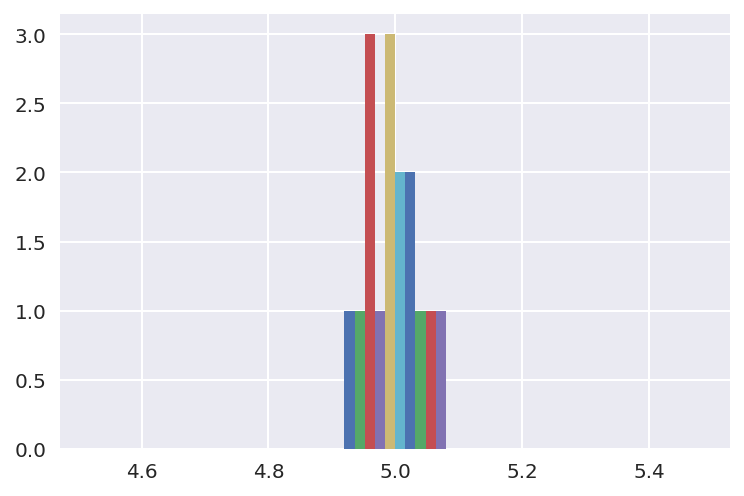

In [19]:
top10 = avg_ratings['avg_rating'].nlargest(n = 10)

ratinglist=[]
for movie in top10.index:
    ratinglist.append(ratings.loc[ratings['movie'] == movie + 1]['rating'])
    
#print(ratinglist)

plt.hist(ratinglist,bins=5)
plt.show()

## Comparing the top 10 most popular movies

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


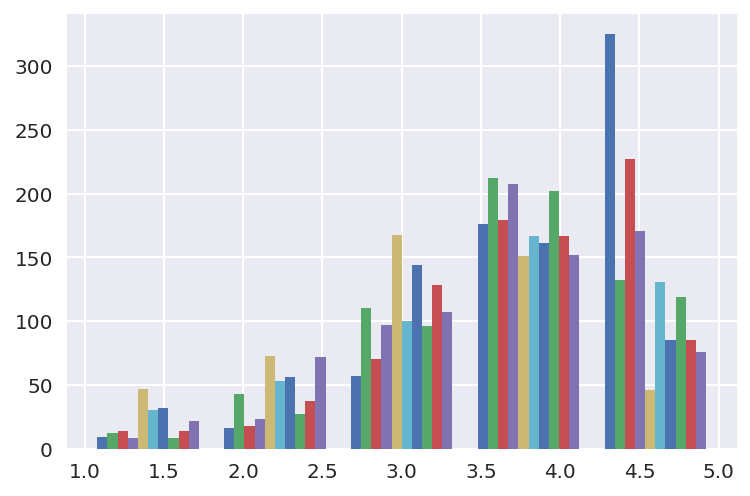

In [7]:
nreviews = ratings['movie'].value_counts()
top10popular = nreviews.head(10)

ratinglist=[]
for movie in top10popular.index:
    ratinglist.append(ratings.loc[ratings['movie'] == movie]['rating'])
    #df.head()

plt.hist(ratinglist,bins=5)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


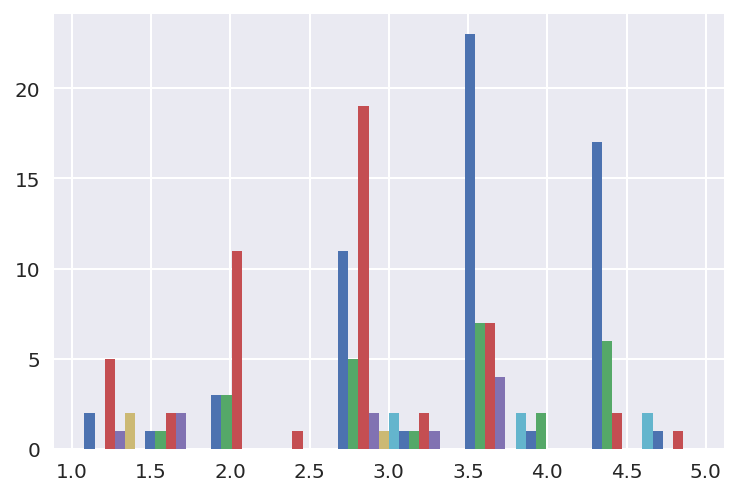

In [9]:
top10 = avg_ratings['avg_rating'].nlargest(n = 10)

ratinglist=[]
for movie in top10.index:
    ratinglist.append(ratings.loc[ratings['movie'] == movie]['rating'])
    #df.head()

plt.hist(ratinglist,bins=5)
plt.show()

# All ratings of movies from three genres of your choice 

In [10]:
headers = ['Id','Title', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 
           'Crime','Documentary', 'Drama', 'Fantasy', 'Noir', 'Horror', 'Musical', 'Mystery', 
           'Romance', 'Scifi', 'Thriller', 'War', 'Western']
movies = pd.read_table('data/movies3.txt', header = None, names = headers)
movies.index = movies.index + 1
movies.head()

,Id,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Noir,Horror,Musical,Mystery,Romance,Scifi,Thriller,War,Western
1,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Plotting ratings for `Childrens` genre movies

Text(0.5,1,'Movie ratings for childrens genre')

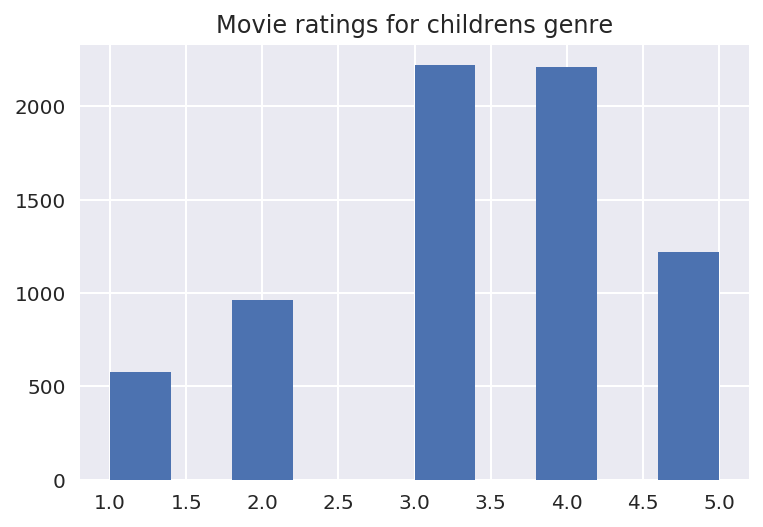

In [11]:
unknowns = movies.loc[movies['Childrens'] == 1]#['Title']
unknown_ratings = ratings.loc[ratings['movie'].isin(unknowns.index)]
unknown_ratings.hist('rating')
plt.title('Movie ratings for childrens genre')

### Plotting ratings for `War` genre movies

Text(0.5,1,'Movie ratings for War genres')

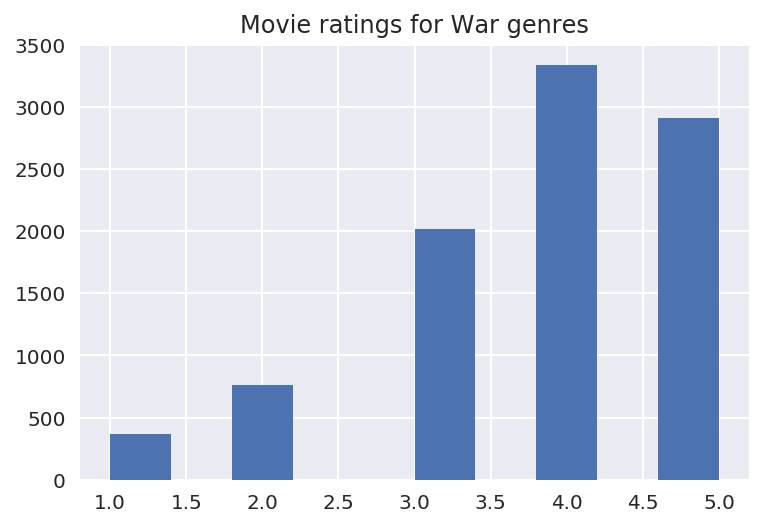

In [12]:
wars = movies.loc[movies['War'] == 1]#['Title']
war_ratings = ratings.loc[ratings['movie'].isin(wars.index)]
war_ratings.hist('rating')
plt.title('Movie ratings for War genres')
#wars.head(100)

### Plotting ratings for `Comedy` genre movies

Text(0.5,1,'Movie ratings for Comedy genres')

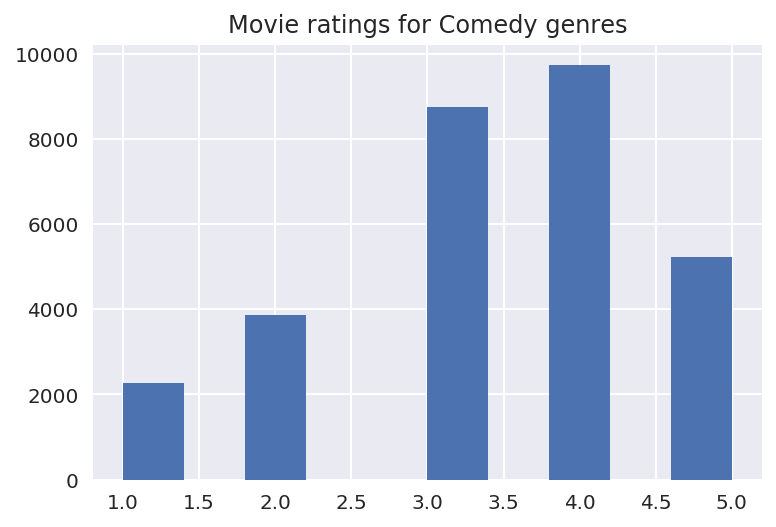

In [13]:
comedies = movies.loc[movies['Comedy'] == 1]#['Title']
comedies_ratings = ratings.loc[ratings['movie'].isin(comedies.index)]
comedies_ratings.hist('rating')
plt.title('Movie ratings for Comedy genres')
#comedies.head(100)

In [ ]:
ratings.loc[ratings['movie'].isin([1373,265])]